In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show(img, img_size = 5):
    
   # show image
   plt.figure(figsize=(img_size,img_size))
   plt.imshow(img, cmap='gray')
   plt.show()

def median_filter(img, filter_size=(3, 3), stride=1):
    
  img_shape = np.shape(img)

  result_shape = tuple( np.int64( 
     (np.array(img_shape)-np.array(filter_size))/stride+1) )

  result = np.zeros(result_shape)

  for h in range(0, result_shape[0], stride):
    for w in range(0, result_shape[1], stride):
      tmp = img[h:h+filter_size[0],w:w+filter_size[1]]
      tmp = np.sort(tmp.ravel())
      result[h,w] = tmp[int(filter_size[0]*filter_size[1]/2)]
  
  return result

def mean_filter(img, filter_size=(3, 3), stride = 1):

  img_shape = np.shape(img)

  result_shape = tuple( np.int64( 
        (np.array(img_shape)-np.array(filter_size))/stride+1) )
  
  result = np.zeros(result_shape)
  
  for h in range(0, result_shape[0], stride):
    for w in range(0, result_shape[1], stride):
      tmp = img[h:h+filter_size[0],w:w+filter_size[1]]
      mean = np.mean(tmp)
      result[h,w] = mean

  return result

In [3]:
def laplacian_filter(img, K_size=3): 
  if len(img.shape) == 3: 
    H, W, C = img.shape
  else: H, W = img.shape 
  # zero padding 
  pad = K_size // 2 
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float) 
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float) 
  tmp = out.copy() 
  # laplacian kernle 
  K = [[0., 1., 0.],[1., -4., 1.], [0., 1., 0.]] 
  # filtering 
  for y in range(H): 
    for x in range(W): 
      out[pad + y, pad + x] = np.sum(K * (tmp[y: y + K_size, x: x + K_size])) 
  out = np.clip(out, 0, 255) 
  out = out[pad: pad + H, pad: pad + W].astype(np.uint8) 
  return out


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/컴퓨터비전

/content/drive/MyDrive/Colab Notebooks/컴퓨터비전


## Mean Filter

Input image


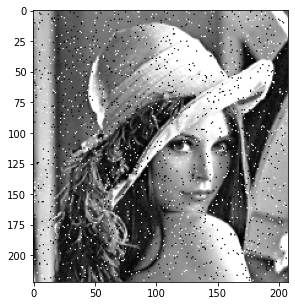

mean 3x3 filtering


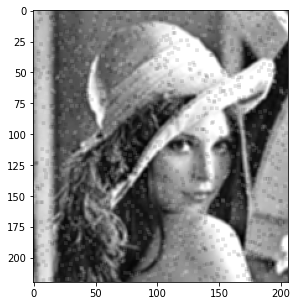

mean 5x5 filtering


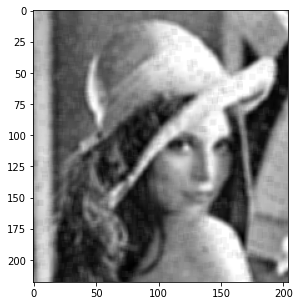

In [5]:
# image 1
img_1 = Image.open('LENA_Salt_Paper.png').convert('L')
print("Input image")
npimg_1 = np.array(img_1)
show(npimg_1)
print("mean 3x3 filtering")
meam_img_1 = mean_filter(npimg_1)
show(meam_img_1)
print("mean 5x5 filtering")
meam_img_1 = mean_filter(npimg_1, (5,5))
show(meam_img_1)

## Median Filter

Input image


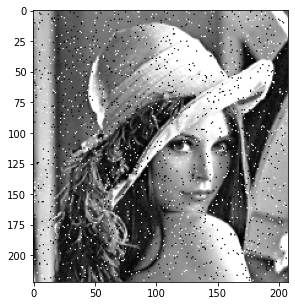

median 3x3 filtering


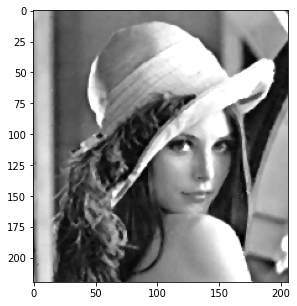

median 5x5 filtering


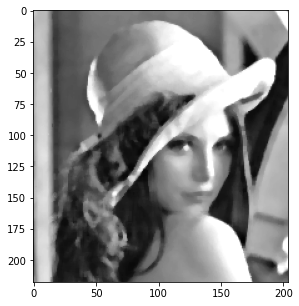

In [6]:
# image 1
img_1 = Image.open('LENA_Salt_Paper.png').convert('L')
print("Input image")
npimg_1 = np.array(img_1)
show(npimg_1)
print("median 3x3 filtering")
med_img_1 = median_filter(npimg_1)
show(med_img_1)
print("median 5x5 filtering")
med_img_1 = median_filter(npimg_1, (5,5))
show(med_img_1)

## Laplacian Filter

Input image


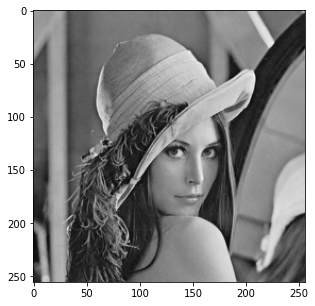

Laplacian 3x3 filtering


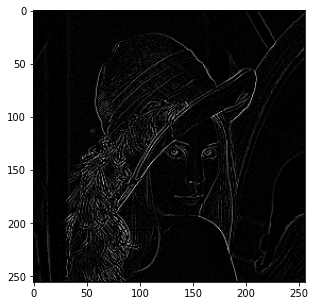

In [7]:
# image 1
img_1 = Image.open('LENA.jpg').convert('L')
print("Input image")
npimg_1 = np.array(img_1)
show(npimg_1)
print("Laplacian 3x3 filtering")
med_img_1 = laplacian_filter(npimg_1)
show(med_img_1)